In [1]:
import copulas.bivariate
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Task 1 

In [2]:
data = np.genfromtxt('data.txt', skip_header = 1, usecols = range(1,4))
print(data)

[[ 8.78 32.26 29.56]
 [ 8.82 31.97 29.31]
 [ 9.28 31.68 29.12]
 ...
 [ 8.45 28.71 31.5 ]
 [ 7.65 27.63 30.67]
 [ 7.75 26.54 30.01]]


In [3]:
LSMEM = data[:,[0]]
Mesonet = data[:,[1]]
VIC = data[:,[2]]

In [4]:
x1 = LSMEM
x2 = - (VIC - LSMEM)

Text(0, 0.5, 'LSMEM - VIC (%)')

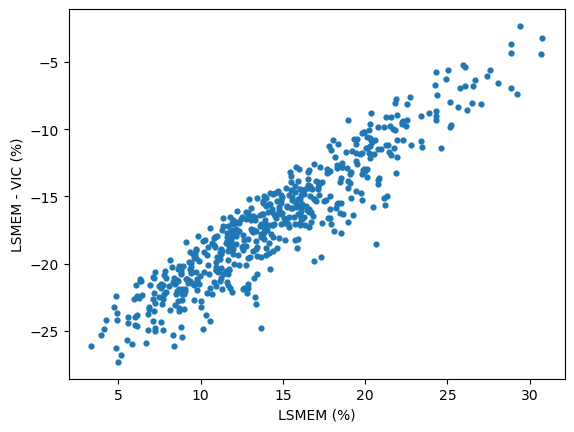

In [5]:
plt.scatter(x1, x2, s = 12)
plt.xlabel('LSMEM (%)')
plt.ylabel('LSMEM - VIC (%)')

In [6]:
alpha1, loc1, beta1 = stats.gamma.fit(x1)
alpha2, loc2, beta2 = stats.gamma.fit(x2)
Y1 = stats.gamma.cdf(x1-loc1, a = alpha1, scale = beta1)
Y2 = stats.gamma.cdf(x2-loc2, a = alpha2, scale = beta2)
print([alpha1, beta1, loc1])
print([alpha2, beta2, loc2])

[8.943570811047376, 1.804007709187812, -1.6564038781216985]
[13.878429701277312, 1.2667824665310081, -34.43505876504197]


Text(0, 0.5, 'Probability')

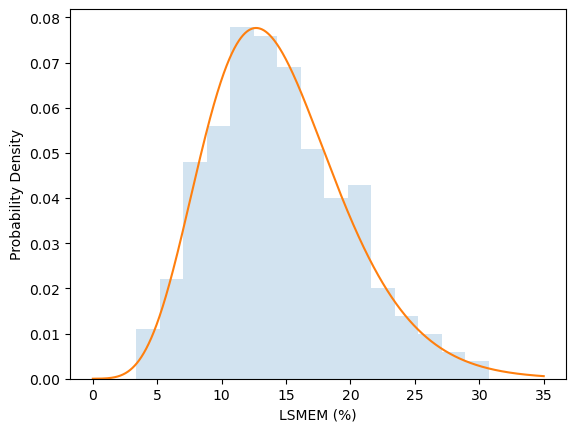

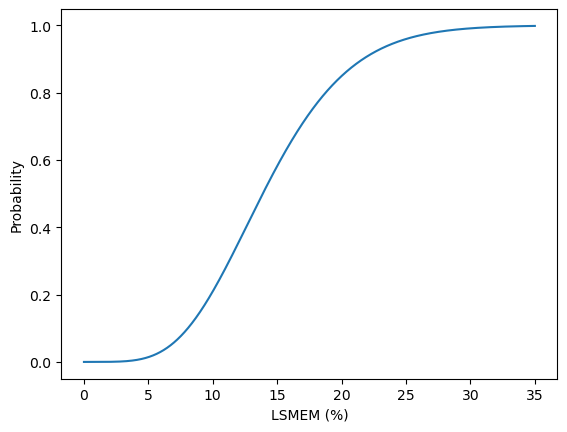

In [7]:
plt.figure(1)
x = np.linspace(0, 35, 10000)
y = stats.gamma.pdf(x-loc1, a = alpha1, scale = beta1)
Y = stats.gamma.cdf(x-loc1, a = alpha1, scale = beta1)
# Plot gamma distribution of LSMEM
plt.hist(x1, density = True, histtype = 'stepfilled', alpha = 0.2, bins = 15)
plt.plot(x, y)
plt.xlabel('LSMEM (%)')
plt.ylabel('Probability Density')
plt.figure(2)
plt.plot(x, Y)
plt.xlabel('LSMEM (%)')
plt.ylabel('Probability')

Text(0, 0.5, 'Probability')

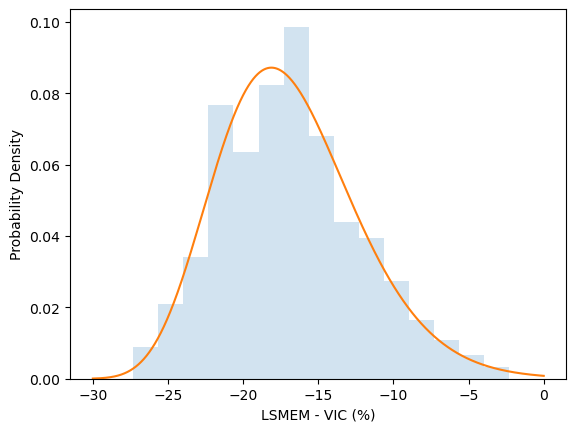

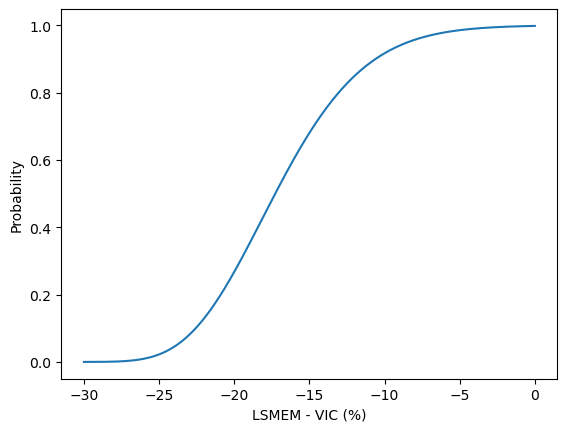

In [8]:
x = np.linspace(-30, 0, 10000)
y = stats.gamma.pdf(x-loc2, a = alpha2, scale = beta2)
Y = stats.gamma.cdf(x-loc2, a = alpha2, scale = beta2)
# Plot gamma distribution of (VIC - LSMEM)
plt.figure(1)
plt.hist(x2, density = True, histtype = 'stepfilled', alpha = 0.2, bins = 15)
plt.plot(x, y)
plt.xlabel('LSMEM - VIC (%)')
plt.ylabel('Probability Density')
plt.figure(2)
plt.plot(x, Y)
plt.xlabel('LSMEM - VIC (%)')
plt.ylabel('Probability')

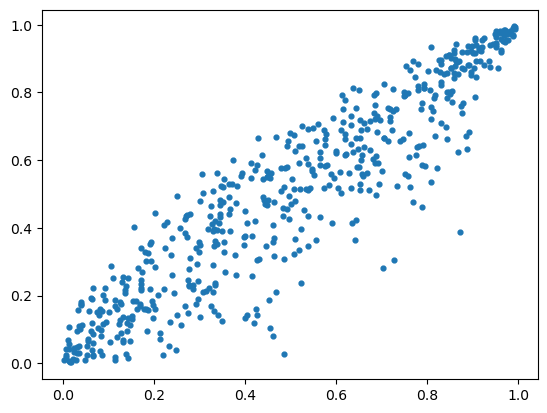

In [9]:
plt.scatter(Y1,Y2, s = 12)

In [10]:
# Fit Clayton Copula
clayton = copulas.bivariate.Clayton()
clayton.fit(np.concatenate((Y1, Y2), axis = 1))
# Fit Gumbel Copula
gumbel = copulas.bivariate.Gumbel()
gumbel.fit(np.concatenate((Y1, Y2), axis = 1))
# Fit Frank Copula
frank = copulas.bivariate.Frank()
frank.fit(np.concatenate((Y1, Y2), axis = 1))

In [11]:
print([clayton.theta, gumbel.theta, frank.theta])

[6.514906148039451, 4.257453074019725, 15.185047107095034]


In [12]:
# Plot parameters
n = 80
x = np.linspace(0, 1, n).reshape((n, 1))
y = np.linspace(0, 1, n).reshape((n, 1))
X, Y = np.meshgrid(x, y)

/tmp/ipykernel_2533496/875479385.py:3: RuntimeWarning: divide by zero encountered in power
  Z_clayton = (X ** -theta + Y ** -theta - 1) ** (-1/theta)
/tmp/ipykernel_2533496/875479385.py:4: UserWarning: The following kwargs were not used by contour: 'linewidth'
  cs_clayton = plt.contour(X, Y, Z_clayton, levels = np.linspace(0.1, 1, 10), linewidth = 1)


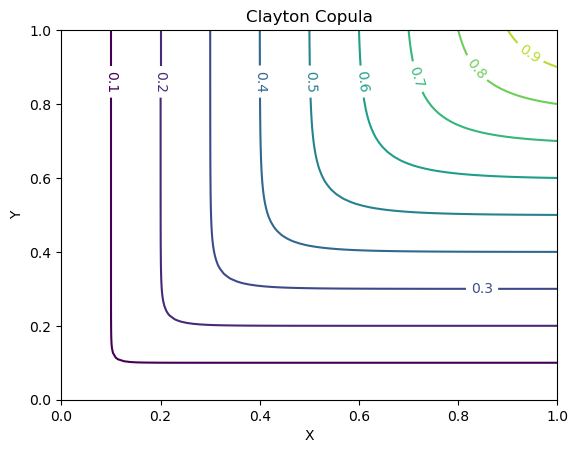

In [13]:
# Clayton Copula
theta = clayton.theta
Z_clayton = (X ** -theta + Y ** -theta - 1) ** (-1/theta)
cs_clayton = plt.contour(X, Y, Z_clayton, levels = np.linspace(0.1, 1, 10), linewidth = 1)
plt.clabel(cs_clayton)
plt.title('Clayton Copula')
plt.xlabel('X')
plt.ylabel('Y')
plt.savefig('./figures/Clayton Copula.jpg')

/home/water/niuzx/.conda/envs/bc/lib/python3.11/site-packages/copulas/bivariate/gumbel.py:82: RuntimeWarning: divide by zero encountered in log
  h = np.power(-np.log(U), self.theta) + np.power(-np.log(V), self.theta)


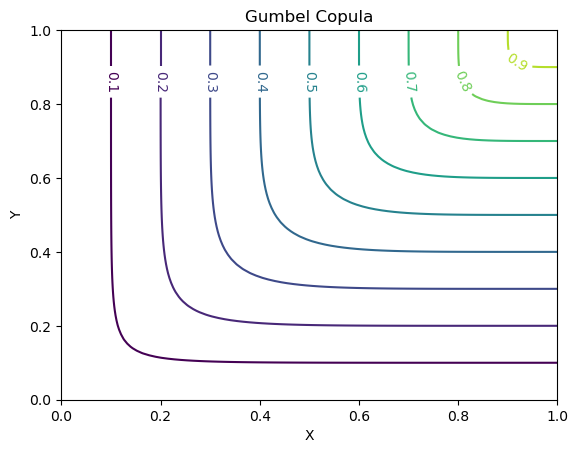

In [14]:
# Gumbel Copula
Z_gumbel = gumbel.cumulative_distribution(np.concatenate((X.reshape(n,1,n), Y.reshape(n,1,n)), axis = 1))
cs_gumbel = plt.contour(X, Y, Z_gumbel, levels = np.linspace(0.1, 1, 10))
plt.clabel(cs_gumbel)
plt.title('Gumbel Copula')
plt.xlabel('X')
plt.ylabel('Y')
plt.savefig('./figures/Gumbel Copula.jpg')

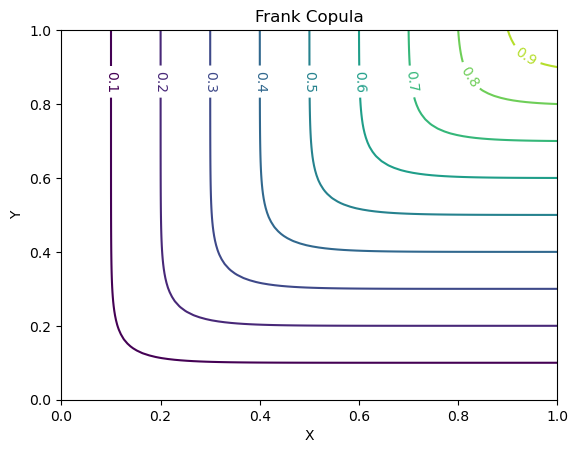

In [15]:
# Frank Copula
Z_frank = frank.cumulative_distribution(np.concatenate((X.reshape(n,1,n), Y.reshape(n,1,n)), axis = 1))
cs_frank = plt.contour(X, Y, Z_frank, levels = np.linspace(0.1, 1, 10))
plt.clabel(cs_frank)
plt.title('Frank Copula')
plt.xlabel('X')
plt.ylabel('Y')
plt.savefig('./figures/Frank Copula.jpg')

# Task 2

In [16]:
# Sampling from Clayton Copula
clayton_syn = clayton.sample(len(data))

# Sampling from Gumbel Copula
gumbel_syn = gumbel.sample(len(data))

# Sampling from Frank Copula
frank_syn = frank.sample(len(data))

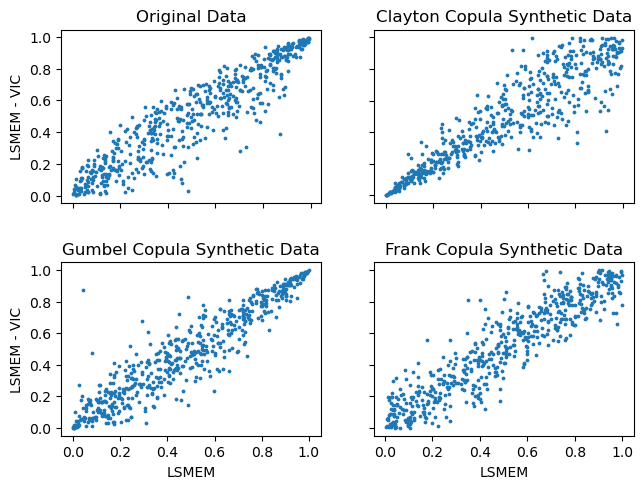

In [17]:
# Plot scatters
fig, axis = plt.subplots(2, 2)
# Original
axis[0, 0].scatter(Y1, Y2, s = 3)
axis[0, 0].set_title('Original Data')
# Clayton
axis[0, 1].scatter(clayton_syn[:, 0], clayton_syn[:, 1], s = 3)
axis[0, 1].set_title('Clayton Copula Synthetic Data')
# Gumbel
axis[1, 0].scatter(gumbel_syn[:, 0], gumbel_syn[:, 1], s = 3)
axis[1, 0].set_title('Gumbel Copula Synthetic Data')
# Frank
axis[1, 1].scatter(frank_syn[:, 0], frank_syn[:, 1], s = 3)
axis[1, 1].set_title('Frank Copula Synthetic Data')

fig.tight_layout()

for ax in axis.flat:
    ax.set(xlabel = 'LSMEM', ylabel = 'LSMEM - VIC')
    
for ax in axis.flat:
    ax.label_outer()

Text(0.5, 0, 'LSMEM - VIC (%)')

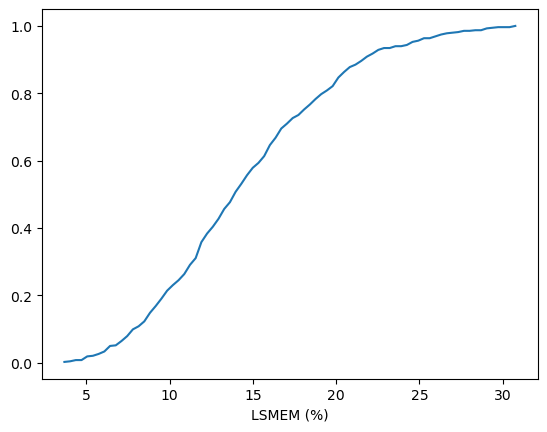

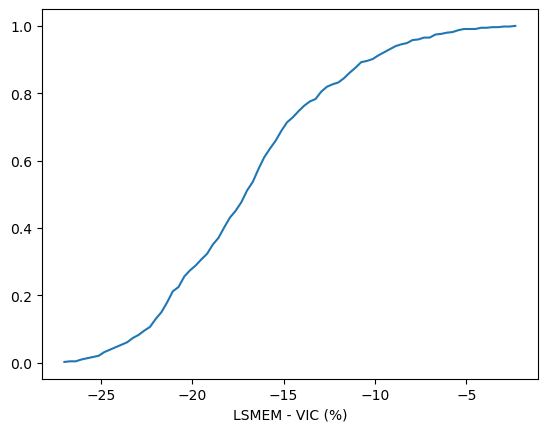

In [18]:
count1, bins_count1 = np.histogram(x1, bins = n)
count2, bins_count2 = np.histogram(x2, bins = n)
pdf1 = count1 / sum(count1)
pdf2 = count2 / sum(count2)
cdf1 = np.cumsum(pdf1)
cdf2 = np.cumsum(pdf2)

plt.figure(1)
plt.plot(bins_count1[1:], cdf1)
plt.xlabel('LSMEM (%)')
plt.figure(2)
plt.plot(bins_count2[1:], cdf2)
plt.xlabel('LSMEM - VIC (%)')

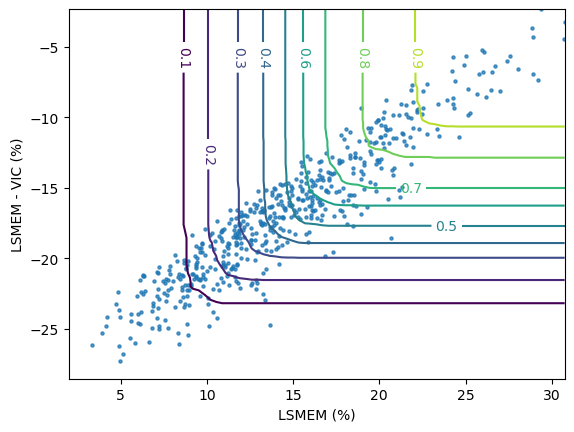

In [19]:
count, x_edges, y_edges = np.histogram2d(x1.reshape(len(data),), x2.reshape(len(data),), bins = n)
pdf = count / (sum(sum(count)))
cdf = np.cumsum(np.cumsum(pdf, axis = 1), axis = 0)
# Plot parameters
X_init, Y_init = np.meshgrid(x_edges[1:], y_edges[1:])
cs = plt.contour(X_init, Y_init, cdf, levels = np.linspace(0.1, 1, 10))
plt.scatter(x1, x2, s = 5, alpha = 0.75)
plt.clabel(cs)
plt.xlabel('LSMEM (%)')
plt.ylabel('LSMEM - VIC (%)')
plt.savefig('./figures/Empirical Joint CDF.jpg')

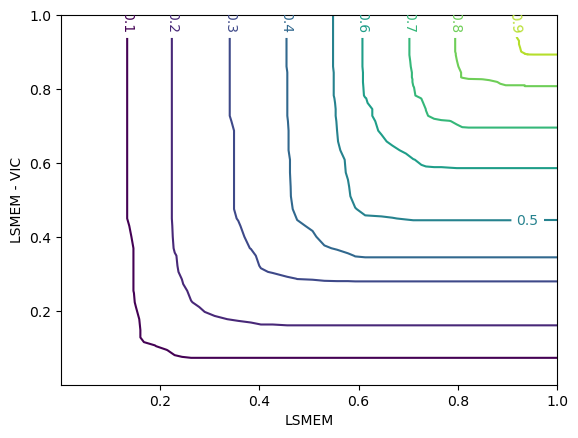

In [20]:
X_cdf, Y_cdf = np.meshgrid(cdf1, cdf2)
cs_emp = plt.contour(X_cdf, Y_cdf, cdf, levels = np.linspace(0.1, 1, 10))
plt.clabel(cs_emp)
plt.xlabel('LSMEM')
plt.ylabel('LSMEM - VIC')
plt.savefig('./figures/Empirical Copula.jpg')

# Task 3

In [21]:
# Sampling LSMEM from Gamma Distribution
copula_sample = np.random.uniform(0, 1, 400)
cdf1_sample = np.random.uniform(0, 1, 400)
cdf2_sample = np.zeros([400])
x1_sample = np.zeros([400])
x2_sample = np.zeros([400])

# Calculating cdf of 'LSMEM-VIC' based on Gumbel Copula
def gumbel_partial_u(u, v, theta):
    value = np.exp(-((-np.log(u)) ** theta + (-np.log(v)) ** theta) ** (1/theta)) *\
        (((-np.log(u)) ** theta + (-np.log(v)) ** theta) ** (1/theta - 1)) *\
        (-np.log(u)) ** (theta - 1) * (1/u)
    return value

# Calculating corresponding data points from cdf based on Bisection Method
for i in range(len(cdf1_sample)):
    upper = 1
    lower = 0
    tol = 1e-15
    cdf2_sample[i] = (upper + lower) / 2
    theta = gumbel.theta
    
    for j in range(100):
        if abs(gumbel_partial_u(cdf1_sample[i], cdf2_sample[i], theta) - copula_sample[i]) < tol:   
            break
        else:
            if (gumbel_partial_u(cdf1_sample[i], cdf2_sample[i], theta) - copula_sample[i]) * \
                (gumbel_partial_u(cdf1_sample[i], upper, theta) - copula_sample[i]) < 0:
                lower = cdf2_sample[i]
            else:
                upper = cdf2_sample[i]
            cdf2_sample[i] = (upper + lower) / 2
            
# Calculating corresponding data points from cdf based on Newton-Raphson Method
for i in range(len(cdf1_sample)):
    
    x10 = 15
    x20 = -15
    tol = 1e-15
    x1_sample[i] = x10
    x2_sample[i] = x20
    
    for j in range(100):
        if abs(stats.gamma.cdf(x1_sample[i]-loc1, a = alpha1, scale = beta1) - cdf1_sample[i]) < tol:
            break
        else:
            x1_sample[i] = x1_sample[i] - (stats.gamma.cdf(x1_sample[i]-loc1, a = alpha1, scale = beta1) - cdf1_sample[i]) \
                            / (stats.gamma.pdf(x1_sample[i]-loc1, a = alpha1, scale = beta1))
    for j in range(100):
        if abs(stats.gamma.cdf(x2_sample[i]-loc2, a = alpha2, scale = beta2) - cdf2_sample[i]) < tol:
            break
        else:
            x2_sample[i] = x2_sample[i] - (stats.gamma.cdf(x2_sample[i]-loc2, a = alpha2, scale = beta2) - cdf2_sample[i]) \
                            / (stats.gamma.pdf(x2_sample[i]-loc2, a = alpha2, scale = beta2))

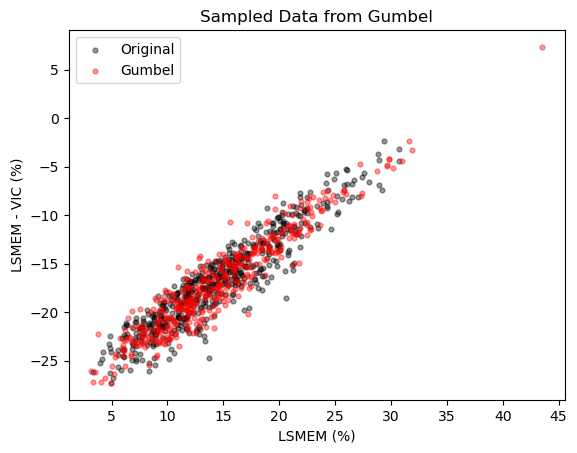

In [22]:
plt.scatter(x1, x2, color = 'black', s = 12, alpha = 0.4)
plt.scatter(x1_sample, x2_sample, color = 'red', s = 12, alpha = 0.4)

plt.xlabel('LSMEM (%)')
plt.ylabel('LSMEM - VIC (%)')
plt.title('Sampled Data from Gumbel')
plt.legend(['Original', 'Gumbel'])
plt.savefig('./figures/Sampled Data from Gumbel Copula.jpg')

# Task 4

The mean of sampled y (VIC‐LSMEM) = 20.25262606932926
The standard deviation of sampled (VIC‐LSMEM) = 2.618620846264924


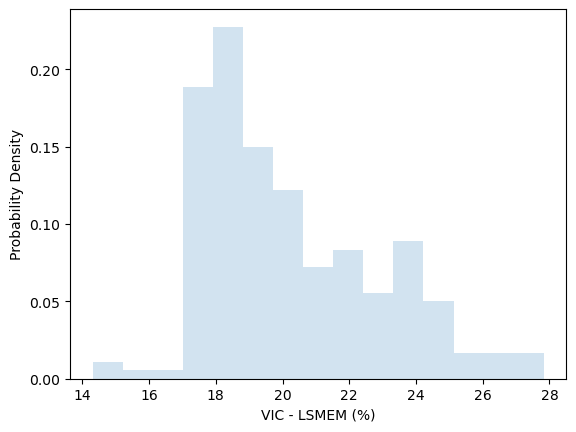

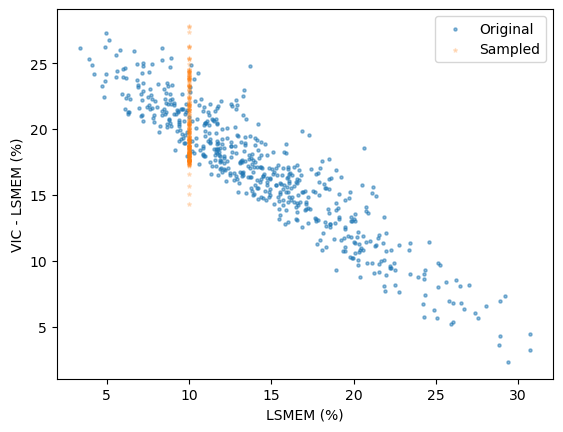

In [23]:
# Calculating cdf value when LSMEM is 10%
Y1_new = stats.gamma.cdf(10-loc1, a = alpha1, scale = beta1)

# Sampling based on Gumbel Copula
sample = np.random.uniform(0, 1, 200)
cdf1_sample_new = Y1_new * np.ones([200])
cdf2_sample_new = np.zeros([200])
x1_sample_new = 10 * np.ones([200])
x2_sample_new = np.zeros([200])

# Calculating corresponding data points from cdf based on Bisection Method
for i in range(len(sample)):
    upper = 1
    lower = 0
    tol = 1e-15
    cdf2_sample_new[i] = (upper + lower) / 2
    theta = gumbel.theta
    
    for j in range(100):
        if abs(gumbel_partial_u(Y1_new, cdf2_sample_new[i], theta) - sample[i]) < tol:   
            break
        else:
            if (gumbel_partial_u(Y1_new, cdf2_sample_new[i], theta) - sample[i]) * \
                (gumbel_partial_u(Y1_new, upper, theta) - sample[i]) < 0:
                lower = cdf2_sample_new[i]
            else:
                upper = cdf2_sample[i]
            cdf2_sample_new[i] = (upper + lower) / 2

# Calculating corresponding data points from cdf based on Newton-Raphson Method
for i in range(len(sample)):
    
    x20 = -15
    tol = 1e-16
    x2_sample_new[i] = x20
    
    for j in range(100):
        if abs(stats.gamma.cdf(x2_sample_new[i]-loc2, a = alpha2, scale = beta2) - cdf2_sample_new[i]) < tol:
            break
        else:
            x2_sample_new[i] = x2_sample_new[i] - (stats.gamma.cdf(x2_sample_new[i]-loc2, a = alpha2, scale = beta2) \
                                                   - cdf2_sample_new[i]) \
                            / (stats.gamma.pdf(x2_sample_new[i]-loc2, a = alpha2, scale = beta2))
            
# Plot distribution of LSMEM-VIC
plt.figure(1)
plt.hist(-x2_sample_new, density = True, histtype = 'stepfilled', alpha = 0.2, bins = 15)
plt.xlabel('VIC - LSMEM (%)')
plt.ylabel('Probability Density')
plt.savefig('./figures/histogram_task4.jpg')
# Calculate mean & standard deviation
μ = np.mean(-x2_sample_new)
σ = np.std(-x2_sample_new)
print('The mean of sampled y (VIC‐LSMEM) =', μ)
print('The standard deviation of sampled (VIC‐LSMEM) =', σ)
plt.figure(2)
plt.scatter(x1, -x2, s = 5, alpha = 0.5)
plt.scatter(x1_sample_new, -x2_sample_new, s = 8, alpha = 0.2, marker = '*')
plt.xlabel('LSMEM (%)')
plt.ylabel('VIC - LSMEM (%)')
plt.legend(['Original', 'Sampled'])
plt.savefig('./figures/scatter_task4.jpg')